<a href="https://colab.research.google.com/github/CalenBlake/CalenBlake/blob/main/STAT3800_Major_Project_Phase_Retrieval_in_Diffractive_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make sure scikit-image is installed:**

In [ ]:
# !pip install scikit-image

**Import necessary libraries and set random seed:**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.fft import fftn, ifftn, fftshift, ifftshift

from skimage import io, color, transform, util

from IPython import display

np.random.seed(42);     # best default cat reconstruction
# np.random.seed(8);     # best eiffel tower seed
# np.random.seed(8);      # best small alt cat reconstruction seed

**Read in image and apply transformations:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """


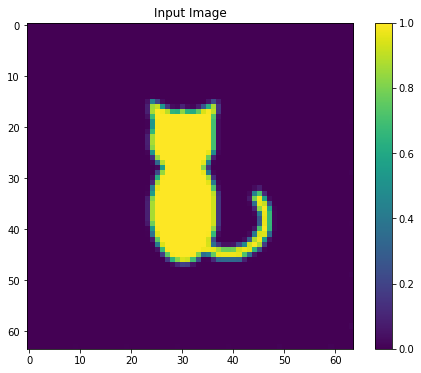

In [ ]:
image = io.imread('https://github.com/CalenBlake/CalenBlake/blob/main/cat.png?raw=true')
# image = io.imread('https://github.com/CalenBlake/CalenBlake/blob/main/smaller%20alt%20cat.png?raw=true')
# image = io.imread('https://github.com/CalenBlake/CalenBlake/blob/main/eiffel%20fill%20test.png?raw=true')

x_tran = color.rgb2gray(image)
# x_tran = util.invert(x_tran)    # uncomment for alternate images (alt cat & eiffel)
x_true = transform.resize(x_tran, (64, 64))
x_true /= np.max(x_true)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = ax.imshow(x_true)
plt.colorbar(im)
ax.set_title('Input Image')
plt.show()

**Plot initial support region and the fourier magnitude of the observed image**

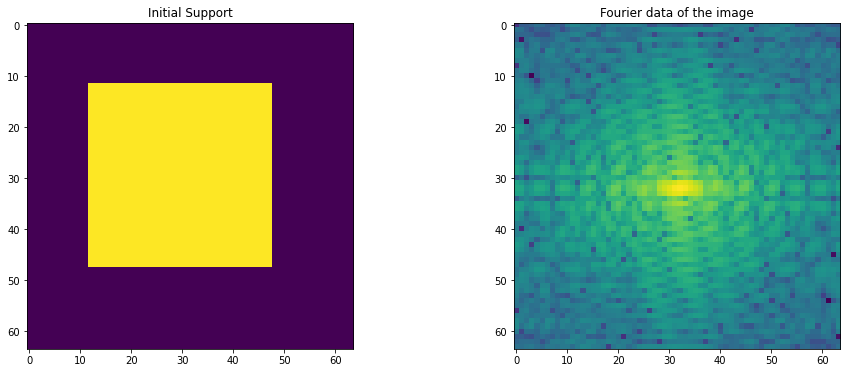

In [ ]:
# Take the foruier transform of the image
X_true = fftn(x_true);
M_true = np.abs(X_true);

# Make initial support
supp = np.zeros([64, 64]);
# supp[12:52, 12:52] = 1;     # eiffel tower support
supp[12:48, 12:48] = 1;     # alt small cat support AND default cat

# Visualise the magnitude of the support
fig = plt.figure(figsize=(16, 6));
ax = fig.add_subplot(121);
im = ax.imshow(supp);
ax.set_title('Initial Support');
# Visualise the fourier information of the image
ax = fig.add_subplot(122);
im = ax.imshow(fftshift(np.log10(M_true)));
ax.set_title('Fourier data of the image');

plt.show();

**Projection Operators**  
P_S := Support projection  
P_M := Magnitude Projection

In [ ]:
# Define the projection operators
# Support Projection
def P_S(x, S_in):
    # Remove data outside support region
    x_new = x*S_in['supp'];
    return x_new

# Magnitude Projection
def P_M(x, M_in):
    X = fftn(x);
    # Preserve the magnitude constraint
    X_new = X/(np.abs(X)) * M_in['M_data'];
    x_new = ifftn(X_new);
    return x_new

**Define a Low Pass Filter for ShrinkWrapping**

In [ ]:
C = np.zeros([64, 64]);
C = np.fft.fftshift(C);
# S := Roughly the exact image region (key pixel data)
C[20:44,20:44] = 1 ;    # S for standard cat
# C[14:46,14:46] = 1 ;    # S for small alt cat
# C[12:51,22:42] = 1 ;    # S for eiffel tower
C = np.fft.ifftshift(C);

# LPF for ShrinkWrapping process
def low_pass_filter(x):
    X = fftn(x);
    X_new = X * C;
    x_new = np.abs(ifftn(X_new));
    return x_new

**Produces final output plot for the report**


*   fourier magnitude and initial support
*   it 100: support and reconstruction
*   it 10000: final support and reconstruction  
Can plot additional iteration results by uncommenting additional blocks (see below).


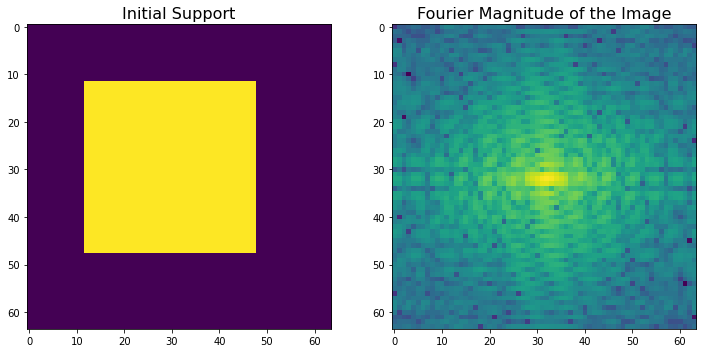

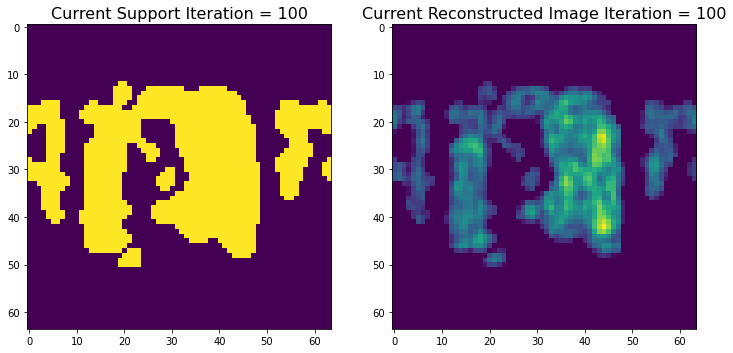

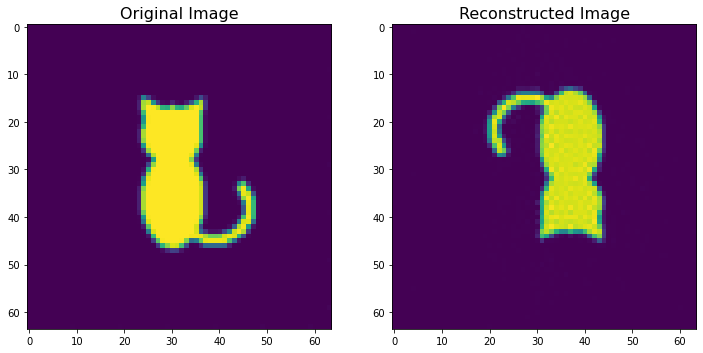

In [ ]:
# FINAL OUTPUT PLOT FOR REPORT!!!
# Visualise the magnitude of the support
fig = plt.figure(figsize=(12, 12));
ax = fig.add_subplot(121);
im = ax.imshow(supp);
ax.set_title('Initial Support', fontsize=16);
# Visualise the fourier information of the image
ax = fig.add_subplot(122);
im = ax.imshow(fftshift(np.log10(M_true)));
ax.set_title('Fourier Magnitude of the Image', fontsize=16);

plt.show();

# Input data to the algorithm
S_in = {'supp':supp};
M_in = {'M_data':M_true};

it_max = 100000;

x = np.random.rand(64, 64);

supp_new = supp;

for it in range(it_max):
    if (it % 2 == 0):
        x = P_S(x, S_in);
        
    if (it % 2 == 1):
        x = P_M(x, M_in);
        
    x_sol = x
        
    # Shrinkwrap Process (every 10 iterates)
    if it % 10 == 9: 
        x_mod = low_pass_filter(x_sol)
        supp_new = x_mod/np.max(x_mod) > 0.12 
        S_in = {'supp': supp_new}
        
    # if (it == 10):
    #     fig = plt.figure(figsize=(12, 12));
    #     ax = fig.add_subplot(121);
    #     im = ax.imshow(np.abs(x_sol));
    #     ax.set_title("Current Reconstructed Image Iteration = %d" % it);
    #     ax = fig.add_subplot(122);
    #     im = ax.imshow(supp_new);
    #     ax.set_title("Current Support Iteration = %d" % it);

    #     plt.show()
        
    if (it == 100):
        fig = plt.figure(figsize=(12, 12));
        ax = fig.add_subplot(121);
        im = ax.imshow(supp_new);
        ax.set_title("Current Support Iteration = %d" % it, fontsize=16);
        ax = fig.add_subplot(122);
        im = ax.imshow(np.abs(x_sol));
        ax.set_title("Current Reconstructed Image Iteration = %d" % it, fontsize=16);

        plt.show()
        
    # if (it == 1000):
    #     fig = plt.figure(figsize=(12, 12));
    #     ax = fig.add_subplot(121);
    #     im = ax.imshow(np.abs(x_sol));
    #     ax.set_title("Current Reconstructed Image Iteration = %d" % it);
    #     ax = fig.add_subplot(122);
    #     im = ax.imshow(supp_new);
    #     ax.set_title("Current Support Iteration = %d" % it);

    #     plt.show()

# Compare reconstructed and original image
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(121);
im = ax.imshow(x_true, interpolation='nearest');
ax.set_title('Original Image', fontsize=16);
ax = fig.add_subplot(122);
im = ax.imshow(np.abs(x_sol), interpolation='nearest');
ax.set_title('Reconstructed Image', fontsize=16);

plt.show()